In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter
import os

# Read and display the CSV with Pandas
file = os.path.join("..", "Project 1", "Life Expectancy Data.csv")
df = pd.read_csv(file, encoding="ISO-8859-1")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
# Identify incomplete rows
df.count()

Country                            2938
Year                               2938
Status                             2938
Life expectancy                    2928
Adult Mortality                    2928
infant deaths                      2938
Alcohol                            2744
percentage expenditure             2938
Hepatitis B                        2385
Measles                            2938
 BMI                               2904
under-five deaths                  2938
Polio                              2919
Total expenditure                  2712
Diphtheria                         2919
 HIV/AIDS                          2938
GDP                                2490
Population                         2286
 thinness  1-19 years              2904
 thinness 5-9 years                2904
Income composition of resources    2771
Schooling                          2775
dtype: int64

In [6]:
# Identify shape of DataFrame
df.shape

(2938, 22)

In [7]:
# Drop all rows with missing information
clean_df = df.dropna(how='any')
clean_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
# Verify dropped rows
clean_df.shape

(1649, 22)

In [9]:
# Verify dropped rows
clean_df.count()

Country                            1649
Year                               1649
Status                             1649
Life expectancy                    1649
Adult Mortality                    1649
infant deaths                      1649
Alcohol                            1649
percentage expenditure             1649
Hepatitis B                        1649
Measles                            1649
 BMI                               1649
under-five deaths                  1649
Polio                              1649
Total expenditure                  1649
Diphtheria                         1649
 HIV/AIDS                          1649
GDP                                1649
Population                         1649
 thinness  1-19 years              1649
 thinness 5-9 years                1649
Income composition of resources    1649
Schooling                          1649
dtype: int64

In [10]:
# Determine the data types of each column.
clean_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [11]:
# Get a list of all of our columns for easy reference
clean_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [76]:
# Reorganizing the columns using double brackets
organized_df = clean_df[['Country', 'Year', 'Status', 'Life expectancy ', 'Population', 'Adult Mortality', 
                         'under-five deaths ', 'infant deaths', ' HIV/AIDS', 'Diphtheria ', 'Hepatitis B', 'Measles ', 
                         'Polio', ' thinness 5-9 years', ' thinness  1-19 years', 'Alcohol', ' BMI ', 'GDP', 
                         'percentage expenditure', 'Total expenditure', 'Income composition of resources', 
                         'Schooling']]
organized_df.head(100)

,Country,Year,Status,Life expectancy,Population,Adult Mortality,under-five deaths,infant deaths,HIV/AIDS,Diphtheria,...,Polio,thinness 5-9 years,thinness 1-19 years,Alcohol,BMI,GDP,percentage expenditure,Total expenditure,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,33736494.0,263.0,83,62,0.1,65.0,...,6.0,17.3,17.2,0.01,19.1,584.259210,71.279624,8.16,0.479,10.1
1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Austria,2012,Developed,88.0,8429991.0,7.0,0,0,0.1,92.0,...,92.0,2.0,1.8,12.26,56.1,48333.572730,7878.372355,11.17,0.884,15.7
132,Austria,2011,Developed,88.0,8391643.0,73.0,0,0,0.1,89.0,...,89.0,2.0,1.7,12.04,55.7,51126.741390,8272.306757,1.94,0.880,15.7
133,Austria,2010,Developed,84.0,836344.0,75.0,0,0,0.1,86.0,...,86.0,1.9,1.7,12.10,55.2,46657.629000,7423.228774,11.17,0.872,15.4
134,Austria,2009,Developed,82.0,8343323.0,77.0,0,0,0.1,83.0,...,83.0,1.9,1.7,11.30,54.7,47654.187210,8053.557638,11.19,0.870,15.3


In [13]:
renamed_df = organized_df.rename(columns={"Life expectancy ":"Life Expectancy", 
                                          "under-five deaths ":"Under-Five Deaths", 
                                          "infant deaths":"Infant Deaths", 
                                          " HIV/AIDS":"HIV/AIDS", 
                                          "Diphtheria ":"Diphtheria",
                                          "Measles ":"Measles", 
                                          " thinness 5-9 years":"Thinness 5-9 years", 
                                          " thinness  1-19 years":"Thinness 1-19 years", 
                                          " BMI ":"BMI", 
                                          "percentage expenditure":"Percentage Expenditure", 
                                          "Total expenditure":"Total Expenditure", 
                                          "Income composition of resources":"Income Composition of Resources"})
renamed_df.head()

,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,33736494.0,263.0,83,62,0.1,65.0,...,6.0,17.3,17.2,0.01,19.1,584.259210,71.279624,8.16,0.479,10.1
1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5


In [14]:
filtered_df = renamed_df.loc[(renamed_df["Year"] <= 2014)]
filtered_df

,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
5,Afghanistan,2010,Developing,58.8,2883167.0,279.0,102,74,0.1,66.0,...,66.0,18.4,18.4,0.01,16.7,553.328940,79.679367,9.20,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,12777511.0,723.0,42,27,33.6,65.0,...,67.0,9.4,9.4,4.36,27.1,454.366654,0.000000,7.13,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,12633897.0,715.0,41,26,36.7,68.0,...,7.0,9.9,9.8,4.06,26.7,453.351155,0.000000,6.52,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,125525.0,73.0,40,25,39.8,71.0,...,73.0,1.3,1.2,4.43,26.3,57.348340,0.000000,6.53,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,12366165.0,686.0,39,25,42.1,75.0,...,76.0,1.7,1.6,1.72,25.9,548.587312,0.000000,6.16,0.427,9.8


In [12]:
filtered_df.describe()

,Year,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,Hepatitis B,Measles,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
count,1647.000000,1647.000000,1.647000e+03,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.000000,1647.00000,1647.000000,1647.000000
mean,2007.831815,69.299757,1.465092e+07,168.214936,44.223437,32.554948,1.986157,84.157863,79.214329,2226.494839,83.602307,4.902429,4.845355,4.535902,38.128112,5570.035273,699.557463,5.95456,0.631565,12.119854
std,4.082563,8.799045,7.050070e+07,125.343247,162.990487,120.915746,6.035666,21.584035,25.613177,10091.743981,22.379426,4.645701,4.591059,4.030093,19.754611,11482.144013,1760.210462,2.30014,0.183133,2.796172
min,2000.000000,44.000000,3.400000e+01,1.000000,0.000000,0.000000,0.100000,2.000000,2.000000,0.000000,3.000000,0.100000,0.100000,0.010000,2.000000,1.681350,0.000000,0.74000,0.000000,4.200000
25%,2005.000000,64.350000,1.929265e+05,77.000000,1.000000,1.000000,0.100000,82.000000,74.000000,0.000000,81.000000,1.700000,1.600000,0.815000,19.500000,461.936686,37.304832,4.40500,0.509500,10.350000
50%,2008.000000,71.700000,1.419631e+06,148.000000,4.000000,3.000000,0.100000,92.000000,89.000000,15.000000,93.000000,3.200000,3.000000,3.790000,43.700000,1592.572182,145.102253,5.84000,0.673000,12.300000
75%,2011.000000,75.000000,7.625918e+06,227.000000,29.000000,22.000000,0.700000,97.000000,96.000000,372.500000,97.000000,7.100000,7.050000,7.345000,55.800000,4726.998869,509.996755,7.46500,0.751000,14.000000
max,2014.000000,89.000000,1.293859e+09,723.000000,2100.000000,1600.000000,50.600000,99.000000,99.000000,131441.000000,99.000000,28.200000,27.200000,17.870000,77.100000,119172.741800,18961.348600,14.39000,0.936000,20.700000


In [15]:
filtered_df.to_csv("cleaned_data_output.csv")

The Correlation (R) between Life Expectancy Age and Population is: -0.02


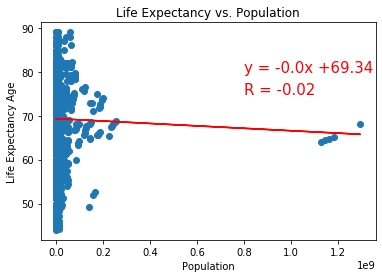

800000000


In [40]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Population"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation and r_value string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Population")
plt.xlabel("Population")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(8.0e8,80),fontsize=15,color="red")
plt.annotate(r_value, (8.0e8,75), fontsize = 15, color = "red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Population is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Life Expectancy Age and Adult Mortality is: -0.7


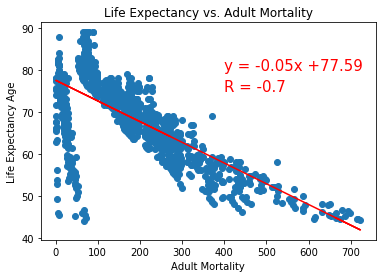

In [41]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Adult Mortality"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Adult Mortality")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(400,80),fontsize=15,color="red")
plt.annotate(r_value,(400,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Adult Mortality is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Under-Five Deaths is: -0.19


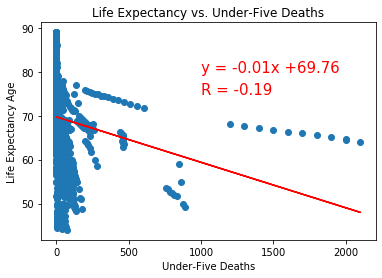

In [42]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Under-Five Deaths"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Under-Five Deaths")
plt.xlabel("Under-Five Deaths")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(1000,80),fontsize=15,color="red")
plt.annotate(r_value,(1000,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Under-Five Deaths is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Infant Deaths is: -0.17


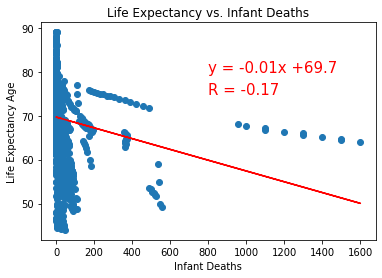

In [43]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Infant Deaths"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Infant Deaths")
plt.xlabel("Infant Deaths")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(800,80),fontsize=15,color="red")
plt.annotate(r_value,(800,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Infant Deaths is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and HIV/AIDS is: -0.59


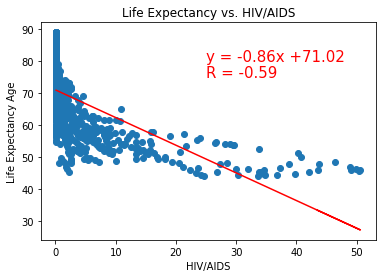

In [44]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["HIV/AIDS"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
r_value = "R = " + str(round(rvalue,2))

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. HIV/AIDS")
plt.xlabel("HIV/AIDS")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(25,80),fontsize=15,color="red")
plt.annotate(r_value,(25,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and HIV/AIDS is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Diphtheria is: 0.34


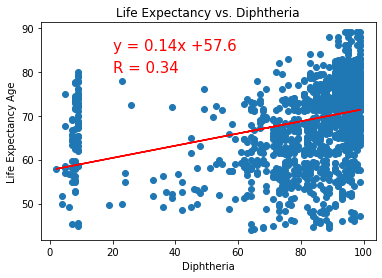

In [46]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Diphtheria"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Diphtheria")
plt.xlabel("Diphtheria")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(20,85),fontsize=15,color="red")
plt.annotate(r_value,(20,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Diphtheria is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Hepatitis B is: 0.2


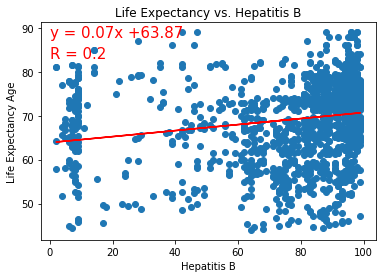

In [48]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Hepatitis B"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Hepatitis B")
plt.xlabel("Hepatitis B")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0,88),fontsize=15,color="red")
plt.annotate(r_value,(0,83),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Hepatitis B is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Measles is: -0.07


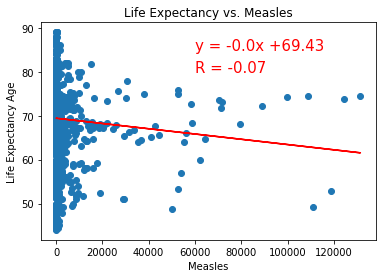

In [51]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Measles"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Measles")
plt.xlabel("Measles")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(60000,85),fontsize=15,color="red")
plt.annotate(r_value,(60000,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Measles is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Polio is: 0.33


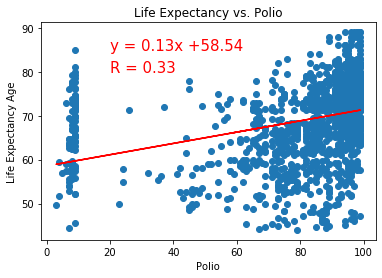

In [52]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Polio"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Polio")
plt.xlabel("Polio")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(20,85),fontsize=15,color="red")
plt.annotate(r_value,(20,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Polio is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Thinness 5-9 years is: -0.46


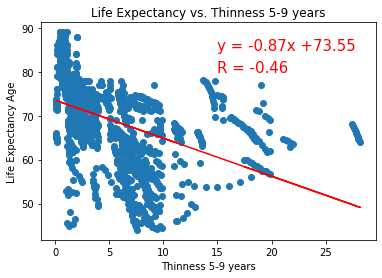

In [59]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Thinness 5-9 years"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Thinness 5-9 years")
plt.xlabel("Thinness 5-9 years")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(15,85),fontsize=15,color="red")
plt.annotate(r_value,(15,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Thinness 5-9 years is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Thinness 1-19 years is: -0.46


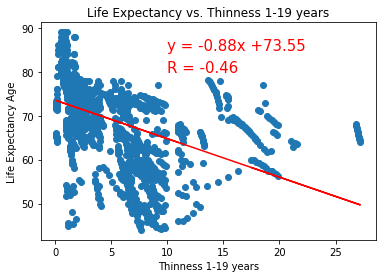

In [60]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Thinness 1-19 years"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Thinness 1-19 years")
plt.xlabel("Thinness 1-19 years")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(10,85),fontsize=15,color="red")
plt.annotate(r_value,(10,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Thinness 1-19 years is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Alcohol is: 0.4


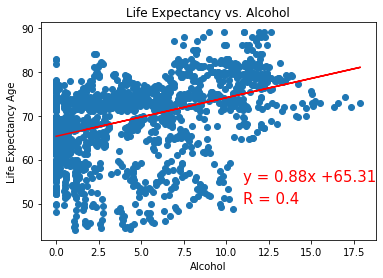

In [62]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Alcohol"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(11,55),fontsize=15,color="red")
plt.annotate(r_value,(11,50),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Alcohol is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and BMI is: 0.54


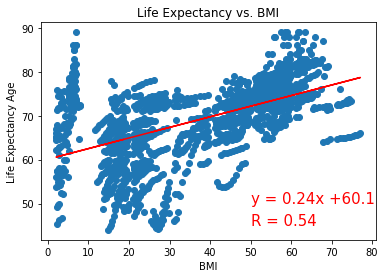

In [64]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["BMI"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. BMI")
plt.xlabel("BMI")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(50,50), fontsize=15,color="red")
plt.annotate(r_value,(50,45), fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and BMI is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and GDP is: 0.44


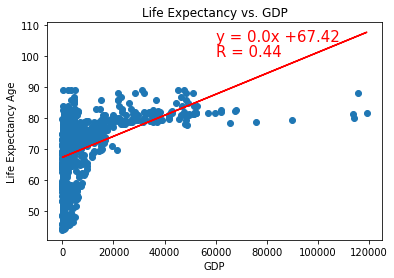

In [67]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["GDP"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. GDP")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(60000,105),fontsize=15,color="red")
plt.annotate(r_value,(60000,100),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and GDP is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Percentage Expenditure is: 0.41


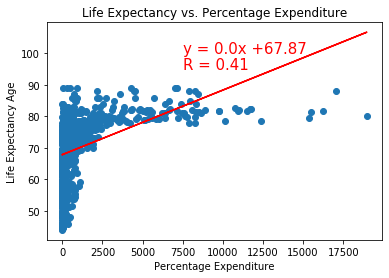

In [71]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Percentage Expenditure"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Percentage Expenditure")
plt.xlabel("Percentage Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(7500,100),fontsize=15,color="red")
plt.annotate(r_value,(7500,95),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Percentage Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Total Expenditure is: 0.18


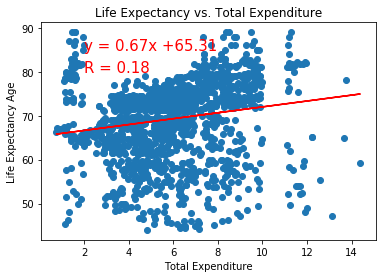

In [72]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Total Expenditure"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Total Expenditure")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(2,85),fontsize=15,color="red")
plt.annotate(r_value,(2,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Income Composition of Resources is: 0.72


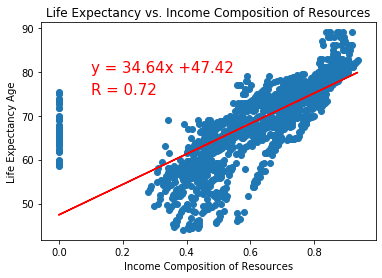

In [74]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Income Composition of Resources"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Income Composition of Resources")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.1,80),fontsize=15,color="red")
plt.annotate(r_value,(0.1,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Income Composition of Resources is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Schooling is: 0.73


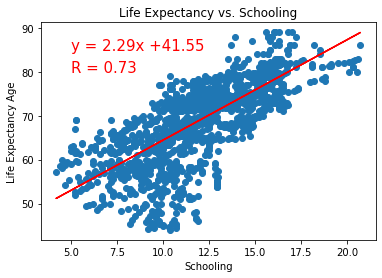

In [75]:
# Calculate the correlation coefficient and linear regression models

# Define x-values and y-values and place into lists
x_values = filtered_df["Schooling"]
y_values = filtered_df["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Schooling")
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(5,85),fontsize=15,color="red")
plt.annotate(r_value,(5,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Schooling is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Total Expenditure is: 0.18


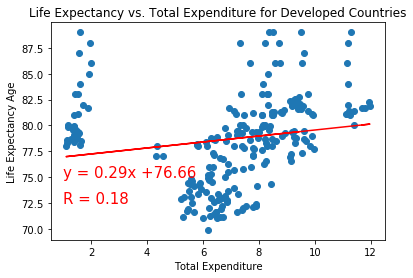

In [151]:
# Total Expenditure vs Life Expectancy for Developed Country
dev_expen = filtered_df.loc[filtered_df["Status"] == "Developed", ["Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

# Define x-values and y-values and place into lists
x_values = dev_expen["Total Expenditure"]
y_values = dev_expen["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Total Expenditure for Developed Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(1,75),fontsize=15,color="red")
plt.annotate(r_value,(1,72.5),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()

The Correlation (R) between Life Expectancy Age and Total Expenditure is: 0.1


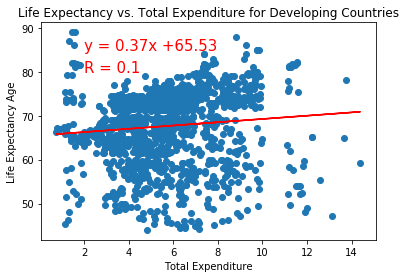

In [150]:
# Total Expenditure vs Life Expectancy for Developing Country
developing_expen = filtered_df.loc[filtered_df["Status"] == "Developing", ["Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

# Define x-values and y-values and place into lists
x_values = developing_expen["Total Expenditure"]
y_values = developing_expen["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Life Expectancy vs. Total Expenditure for Developing Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(2,85),fontsize=15,color="red")
plt.annotate(r_value,(2,80),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: 0.34


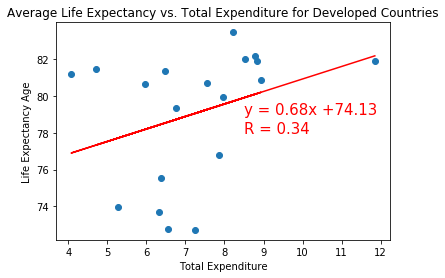

In [149]:
# Total Expenditure vs Life Expectancy for Developed Country
dev_expen = filtered_df.loc[filtered_df["Status"] == "Developed", ["Country", "Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

country_groupby = dev_expen.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Total Expenditure"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Total Expenditure for Developed Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(8.5,79),fontsize=15,color="red")
plt.annotate(r_value,(8.5,78),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: 0.13


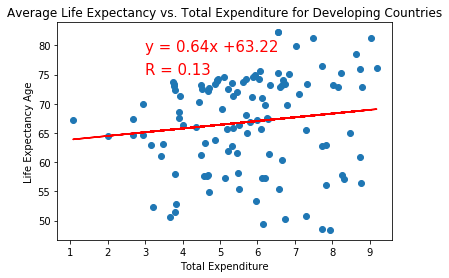

In [167]:
# Total Expenditure vs Life Expectancy for Developing Country
developing_expen = filtered_df.loc[filtered_df["Status"] == "Developing", ["Country", "Life Expectancy", "Total Expenditure", "Percentage Expenditure"]]

country_groupby = developing_expen.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Total Expenditure"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Total Expenditure for Developing Countries")
plt.xlabel("Total Expenditure")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(3,79),fontsize=15,color="red")
plt.annotate(r_value,(3,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Total Expenditure is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: 0.74


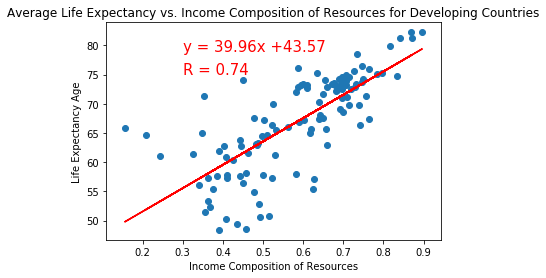

In [153]:
# Income Composition vs Life Expectancy for Developing Country
developing_income = filtered_df.loc[filtered_df["Status"] == "Developing", ["Country", "Life Expectancy", "Income Composition of Resources"]]

country_groupby = developing_income.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Income Composition of Resources"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Income Composition of Resources for Developing Countries")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.3,79),fontsize=15,color="red")
plt.annotate(r_value,(0.3,75),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: 0.83


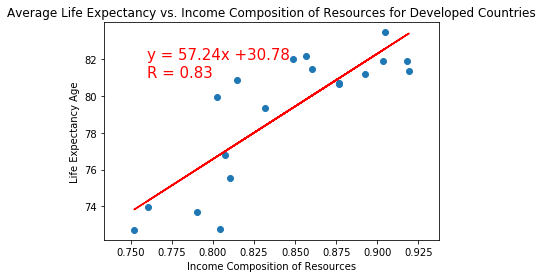

In [146]:
# Income Composition vs Life Expectancy for Developed Country
developed_income = filtered_df.loc[filtered_df["Status"] == "Developed", ["Country", "Life Expectancy", "Income Composition of Resources"]]

country_groupby = developed_income.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Income Composition of Resources"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Income Composition of Resources for Developed Countries")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.76,82),fontsize=15,color="red")
plt.annotate(r_value,(0.76,81),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Income Composition of Resources is: {round(rvalue,2)}")

# Show plot
plt.show()


In [152]:
filtered_df

,Country,Year,Status,Life Expectancy,Population,Adult Mortality,Under-Five Deaths,Infant Deaths,HIV/AIDS,Diphtheria,...,Polio,Thinness 5-9 years,Thinness 1-19 years,Alcohol,BMI,GDP,Percentage Expenditure,Total Expenditure,Income Composition of Resources,Schooling
1,Afghanistan,2014,Developing,59.9,327582.0,271.0,86,64,0.1,62.0,...,58.0,17.5,17.5,0.01,18.6,612.696514,73.523582,8.18,0.476,10.0
2,Afghanistan,2013,Developing,59.9,31731688.0,268.0,89,66,0.1,64.0,...,62.0,17.7,17.7,0.01,18.1,631.744976,73.219243,8.13,0.470,9.9
3,Afghanistan,2012,Developing,59.5,3696958.0,272.0,93,69,0.1,67.0,...,67.0,18.0,17.9,0.01,17.6,669.959000,78.184215,8.52,0.463,9.8
4,Afghanistan,2011,Developing,59.2,2978599.0,275.0,97,71,0.1,68.0,...,68.0,18.2,18.2,0.01,17.2,63.537231,7.097109,7.87,0.454,9.5
5,Afghanistan,2010,Developing,58.8,2883167.0,279.0,102,74,0.1,66.0,...,66.0,18.4,18.4,0.01,16.7,553.328940,79.679367,9.20,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,12777511.0,723.0,42,27,33.6,65.0,...,67.0,9.4,9.4,4.36,27.1,454.366654,0.000000,7.13,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,12633897.0,715.0,41,26,36.7,68.0,...,7.0,9.9,9.8,4.06,26.7,453.351155,0.000000,6.52,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,125525.0,73.0,40,25,39.8,71.0,...,73.0,1.3,1.2,4.43,26.3,57.348340,0.000000,6.53,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,12366165.0,686.0,39,25,42.1,75.0,...,76.0,1.7,1.6,1.72,25.9,548.587312,0.000000,6.16,0.427,9.8


The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: -0.86


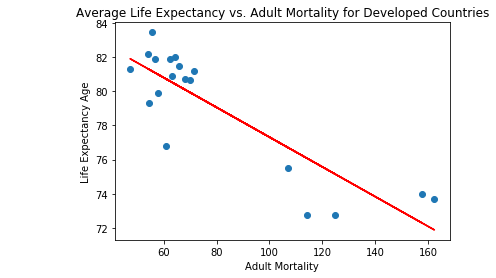

In [166]:
# Adult Morality vs Life Expectancy for Developed Country
developed_mortality = filtered_df.loc[filtered_df["Status"] == "Developed", ["Country", "Life Expectancy", "Adult Mortality"]]

country_groupby = developed_morality.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Adult Mortality"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Adult Mortality for Developed Countries")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(0.76,82),fontsize=15,color="red")
plt.annotate(r_value,(0.76,81),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: {round(rvalue,2)}")

# Show plot
plt.show()


The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: -0.85


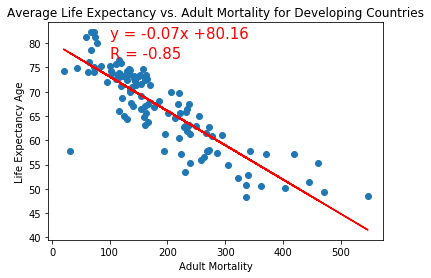

In [165]:
# Adult Morality vs Life Expectancy for Developing Country
developing_mortality = filtered_df.loc[filtered_df["Status"] == "Developing", ["Country", "Life Expectancy", "Adult Mortality"]]

country_groupby = developing_mortality.groupby("Country").mean()

# Define x-values and y-values and place into lists
x_values = country_groupby["Adult Mortality"]
y_values = country_groupby["Life Expectancy"]

# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r_value = "R = " + str(round(rvalue,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Average Life Expectancy vs. Adult Mortality for Developing Countries")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy Age")
plt.annotate(line_eq,(100,81),fontsize=15,color="red")
plt.annotate(r_value,(100,77),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Average Life Expectancy Age and Adult Mortality is: {round(rvalue,2)}")

# Show plot
plt.show()
